Ideas on V2:
- extract cabin deck out of cabin - DONE; 'Deck' column
- improve age, fare NaN handling
- divide fare if more than 1 person on it using SibSp/Parch - DONE, not an issue
Future ideas:
- try a different model type (XGBoost?)

In [116]:
import pandas as pd

train_df = pd.read_csv("./train.csv")
train_df.set_index("PassengerId", inplace=True)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [117]:
train_df_orig = pd.read_csv("./train.csv")
train_df_orig.set_index("Name", inplace=True)
train_df_orig.sort_index(inplace=True)
train_df_orig[['Fare', 'SibSp', 'Parch']]

,Fare,SibSp,Parch
Name,,,
"Abbing, Mr. Anthony",7.5500,0,0
"Abbott, Mr. Rossmore Edward",20.2500,1,1
"Abbott, Mrs. Stanton (Rosa Hunt)",20.2500,1,1
"Abelson, Mr. Samuel",24.0000,1,0
"Abelson, Mrs. Samuel (Hannah Wizosky)",24.0000,1,0
"Adahl, Mr. Mauritz Nils Martin",7.2500,0,0
"Adams, Mr. John",8.0500,0,0
"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",9.4750,1,0
"Aks, Mrs. Sam (Leah Rosen)",9.3500,0,1


Don't see the advantage to bucketing age if LinRegressor

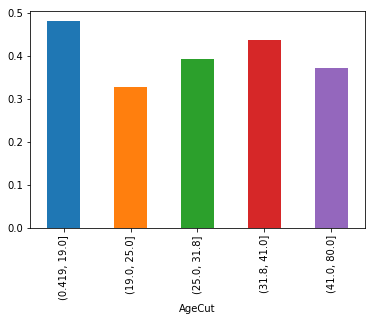

In [87]:
%matplotlib inline
train_df['AgeCut'] = pd.qcut(train_df['Age'], 5) #[0, .25, .5, .75, 1.]) 
train_df.groupby('AgeCut')['Survived'].mean().sort_index().plot(kind='bar')

In [94]:
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [118]:
extract_deck = lambda x: ("NaN" if pd.isnull(x) else x[0])
train_df['Deck'] = train_df['Cabin'].transform(extract_deck)
train_df['Deck'].value_counts()
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN


In [119]:
test_df = pd.read_csv("./test.csv")
test_df.set_index("PassengerId", inplace=True)
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [120]:
test_df['Deck'] = test_df['Cabin'].transform(extract_deck)
test_df['Deck'].value_counts()
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,NaN
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,NaN
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,NaN


In [121]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

enc = LabelEncoder()

train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
str_names = train_df.select_dtypes(include=[object]).columns
for var in str_names:
    new_classes = set(test_df[var].values) - set(train_df[var].values) 
    test_df.loc[test_df[var].isin(new_classes), var] = np.nan
    train_df[var] = train_df[var].fillna('NA')
    test_df[var] = test_df[var].fillna('NA')
    
    train_df[var] = enc.fit_transform(train_df[var])
    
    test_df[var] = enc.transform(test_df[var])
    #train_df[new_name].isna().any()
    #train_df[name].value_counts()
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,3,7
2,1,1,0,38.0,1,0,71.2833,0,2
3,1,3,0,26.0,0,0,7.9250,3,7
4,1,1,0,35.0,1,0,53.1000,3,2
5,0,3,1,35.0,0,0,8.0500,3,7
6,0,3,1,NaN,0,0,8.4583,2,7
7,0,1,1,54.0,0,0,51.8625,3,4
8,0,3,1,2.0,3,1,21.0750,3,7
9,1,3,0,27.0,0,2,11.1333,3,7


In [102]:
test_df['Deck'].value_counts()

7    327
2     35
1     18
3     13
4      9
5      8
0      7
6      1
Name: Deck, dtype: int64

In [123]:
test_df.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
Deck        False
dtype: bool

In [126]:
from fancyimpute import SoftImpute
from fancyimpute import KNN

In [152]:
# Apparently SoftImpute eeds normalized data?
#pd.DataFrame(SoftImpute().complete(iris_X), columns=iris_X.columns)
#train_df(SoftImpute().complete(train_df), columns=train_df.columns)
#test_df(SoftImpute().complete(test_df), columns=test_df.columns)

train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(train_df.mean(), inplace=True)


In [ ]:
KNN imputation with k=3,5 scored 0.0!!!

In [145]:
knnImpute = KNN(k=3)
train_df_knn = pd.DataFrame(knnImpute.fit_transform(train_df), columns=train_df.columns)
test_df_knn = pd.DataFrame(knnImpute.fit_transform(test_df), columns=test_df.columns)
test_df_knn

Imputing row 1/891 with 0 missing, elapsed time: 0.105
Imputing row 101/891 with 0 missing, elapsed time: 0.106
Imputing row 201/891 with 0 missing, elapsed time: 0.106
Imputing row 301/891 with 1 missing, elapsed time: 0.107
Imputing row 401/891 with 0 missing, elapsed time: 0.107
Imputing row 501/891 with 0 missing, elapsed time: 0.108
Imputing row 601/891 with 0 missing, elapsed time: 0.108
Imputing row 701/891 with 0 missing, elapsed time: 0.109
Imputing row 801/891 with 0 missing, elapsed time: 0.110
Imputing row 1/418 with 0 missing, elapsed time: 0.021
Imputing row 101/418 with 0 missing, elapsed time: 0.022
Imputing row 201/418 with 1 missing, elapsed time: 0.022
Imputing row 301/418 with 0 missing, elapsed time: 0.023
Imputing row 401/418 with 0 missing, elapsed time: 0.023


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3.0,1.0,34.500000,0.0,0.0,7.8292,2.0,7.0
1,3.0,0.0,47.000000,1.0,0.0,7.0000,3.0,7.0
2,2.0,1.0,62.000000,0.0,0.0,9.6875,2.0,7.0
3,3.0,1.0,27.000000,0.0,0.0,8.6625,3.0,7.0
4,3.0,0.0,22.000000,1.0,1.0,12.2875,3.0,7.0
5,3.0,1.0,14.000000,0.0,0.0,9.2250,3.0,7.0
6,3.0,0.0,30.000000,0.0,0.0,7.6292,2.0,7.0
7,2.0,1.0,26.000000,1.0,1.0,29.0000,3.0,7.0
8,3.0,0.0,18.000000,0.0,0.0,7.2292,0.0,7.0
9,3.0,1.0,21.000000,2.0,0.0,24.1500,3.0,7.0


In [153]:
train_df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
Deck        False
dtype: bool

In [154]:
Y_train = train_df['Survived']
X_train = train_df.drop(['Survived'], axis=1)

In [155]:
X_train.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
Deck        False
dtype: bool

In [156]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV()
lr.fit(X_train, Y_train)
pred = lr.predict(test_df_knn)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [157]:
res = pd.DataFrame(pred, index=test_df.index, columns=['Survived'])
res.to_csv('./titanic_submission5.csv')